Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Treinando Base Model...
Epoch 1/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 505ms/step - accuracy: 0.4136 - loss: 3.4505
Epoch 1: val_loss improved from inf to 1.11721, saving model to best_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 214s 601ms/step - accuracy: 0.4138 - loss: 3.4454 - val_accuracy: 0.5531 - val_loss: 1.1172
Epoch 2/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.5968 - loss: 1.0410
Epoch 2: val_loss improved from 1.11721 to 1.05871, saving model to best_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 204s 577ms/step - accuracy: 0.5968 - loss: 1.0410 - val_accuracy: 0.5703 - val_loss: 1.0587
Epoch 3/10
351/351 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.6181 - loss: 1.0023
Epoch 3: val_loss improved from 1.05871 to 0.99009, saving model to best_model.keras
351/351 ━━━━━━━━━━━━━━━━━━━━ 214s 605ms/s

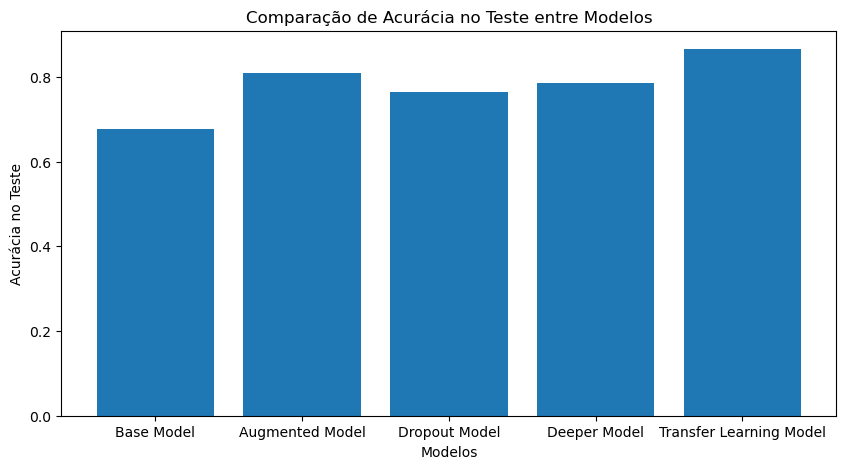

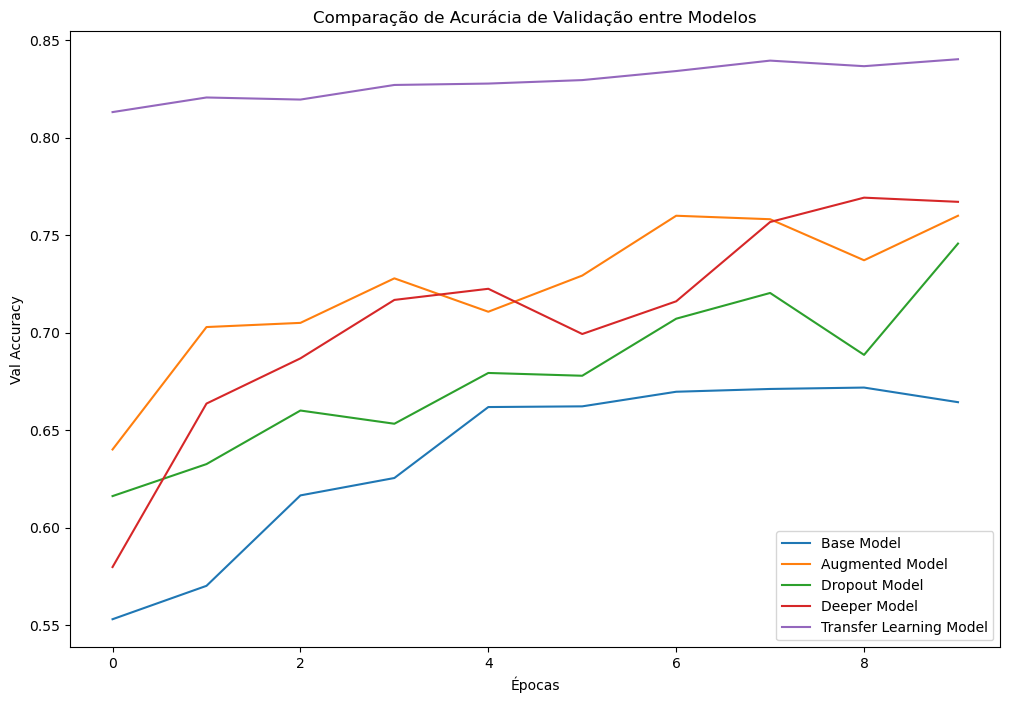

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model

# Diretórios dos dados
train_dir = 'C:/Users/WSJ/Downloads/M9. Deep learning aplicada NLP y visión artificial/seg_train'
test_dir = 'C:/Users/WSJ/Downloads/M9. Deep learning aplicada NLP y visión artificial/seg_test'

# Configuração do ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% para validação
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Geradores de dados
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Função para criar o Modelo Base
def create_base_model():
    model = Sequential([
        Input(shape=(150, 150, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Função para criar o Modelo Aumentado
def create_augmented_model():
    model = Sequential([
        Input(shape=(150, 150, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Função para criar o Modelo com Dropout
def create_dropout_model():
    model = Sequential([
        Input(shape=(150, 150, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Função para criar o Modelo Mais Profundo
def create_deeper_model():
    model = Sequential([
        Input(shape=(150, 150, 3)),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(6, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Função para criar o Modelo com Transfer Learning
def create_transfer_learning_model():
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
    x = base_model.output
    x = Flatten()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(6, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    
    for layer in base_model.layers:
        layer.trainable = False
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Função para treinar e avaliar o modelo
def train_and_evaluate_model(model, train_generator, validation_generator, test_generator, epochs=10):
    callbacks = [
        EarlyStopping(monitor='val_loss', patience=3, verbose=1),
        ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
    ]
    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=callbacks
    )
    best_model = load_model('best_model.keras')
    loss, accuracy = best_model.evaluate(test_generator)
    return accuracy, history

# Lista para armazenar as precisões e históricos
accuracies = []
histories = []

# Modelos
models = [
    create_base_model(),
    create_augmented_model(),
    create_dropout_model(),
    create_deeper_model(),
    create_transfer_learning_model()
]

model_names = [
    'Base Model',
    'Augmented Model',
    'Dropout Model',
    'Deeper Model',
    'Transfer Learning Model'
]

# Treinar e avaliar cada modelo
for model, name in zip(models, model_names):
    print(f'Treinando {name}...')
    accuracy, history = train_and_evaluate_model(model, train_generator, validation_generator, test_generator)
    accuracies.append(accuracy)
    histories.append(history)

# Gráfico comparativo de acurácia nos testes
plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies)
plt.xlabel('Modelos')
plt.ylabel('Acurácia no Teste')
plt.title('Comparação de Acurácia no Teste entre Modelos')
plt.show()

# Gráfico de acurácia de validação durante o treinamento
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    plt.plot(history.history['val_accuracy'], label=model_names[i])

plt.xlabel('Épocas')
plt.ylabel('Val Accuracy')
plt.title('Comparação de Acurácia de Validação entre Modelos')
plt.legend()
plt.show()
